Features shape: (442, 10)
Target shape: (442,)
		 LINEAR REGRESSION
		~~~~~~~~~~~~~~~~~~~~~~

		MSE: 2900.193628493482
		R2: 0.4526027629719195


		 RIDGE REGRESSION
		~~~~~~~~~~~~~~~~~~~~

		Best alpha: 10.0
		MSE: 2875.7787184218428
		R2: 0.4572109567780849


		 LASSO REGRESSION
		~~~~~~~~~~~~~~~~~~~~

		Best alpha: 1.6552151706972245
		MSE: 2800.487334373644
		R2: 0.4714218340088624
         Ridge      Lasso
age   1.931332   0.000000
sex -11.028192  -7.980570
bmi  25.605561  26.185688
bp   16.304191  15.041788
s1  -12.934236  -4.805483
s2    0.538173  -0.000000
s3   -6.125109 -11.071885
s4    8.569484   0.000000
s5   22.749308  21.962318
s6    2.918146   1.738785
		 ELASTIC REGRESSION
		~~~~~~~~~~~~~~~~~~~~~~

		Best alpha: 0.18943499524127286
		Best L1 ratio: 0.5
		MSE: 2855.9931467831357
		R² : 0.4609453857974588


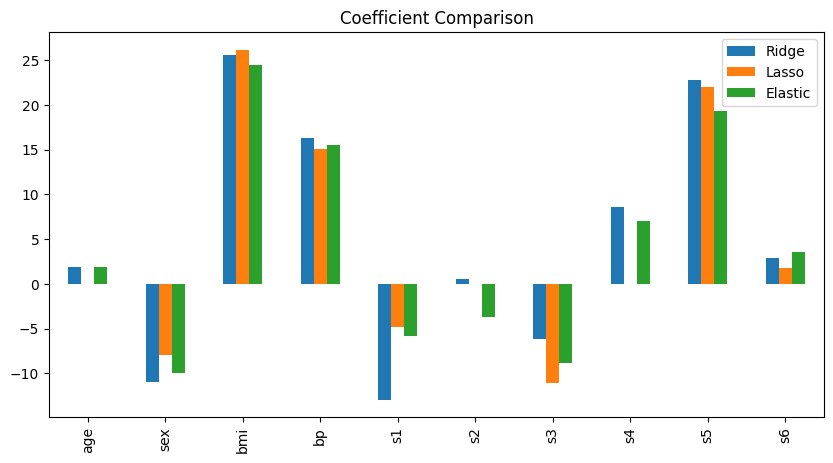

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load
diabetes = load_diabetes()

# Convert to a DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

# Show shape
print("Features shape:", X.shape)   # (442, 10)
print("Target shape:", y.shape)     # (442, )

# Peek at the first 10 rows of features + target
diabetes_df = X.copy()
diabetes_df["target"] = y
diabetes_df.head(10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("\t\t LINEAR REGRESSION")
print("\t\t~~~~~~~~~~~~~~~~~~~~~~\n")
print("\t\tMSE:", mse_linear)
print("\t\tR2:", r2_linear)
print("\n")

# Ridge Regression
print("\t\t RIDGE REGRESSION")
print("\t\t~~~~~~~~~~~~~~~~~~~~\n")
alphas=[0.001,0.01,0.1,1,10,100,1000]
ridge_model=make_pipeline(StandardScaler(),RidgeCV(alphas=alphas,scoring="r2",cv=5))
ridge_model.fit(X_train, y_train)
best_alpha=ridge_model.named_steps["ridgecv"].alpha_
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\t\tBest alpha:", best_alpha)
print("\t\tMSE:", mse_ridge)
print("\t\tR2:", r2_ridge)
print("\n")

# Lasso Regression
print("\t\t LASSO REGRESSION")
print("\t\t~~~~~~~~~~~~~~~~~~~~\n")
lasso_model = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))
lasso_model.fit(X_train, y_train)
best_alpha_lasso = lasso_model.named_steps["lassocv"].alpha_
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\t\tBest alpha:", best_alpha_lasso)
print("\t\tMSE:", mse_lasso)
print("\t\tR2:", r2_lasso)
#shows difference between ridge and lasso regression
import pandas as pd
ridge_coefs = pd.Series(ridge_model.named_steps['ridgecv'].coef_, index=X.columns)
lasso_coefs = pd.Series(lasso_model.named_steps['lassocv'].coef_, index=X.columns)
print(pd.DataFrame({'Ridge': ridge_coefs, 'Lasso': lasso_coefs}))

#elastic regression
print("\t\t ELASTIC REGRESSION")
print("\t\t~~~~~~~~~~~~~~~~~~~~~~\n")
elastic = make_pipeline(
    StandardScaler(),
    ElasticNetCV(cv=5, random_state=42)
)
elastic.fit(X_train, y_train)

best_alpha = elastic.named_steps['elasticnetcv'].alpha_
best_l1_ratio = elastic.named_steps['elasticnetcv'].l1_ratio_
y_pred_elastic = elastic.predict(X_test)

print("\t\tBest alpha:", best_alpha)
print("\t\tBest L1 ratio:", best_l1_ratio)
print("\t\tMSE:", mean_squared_error(y_test, y_pred_elastic))
print("\t\tR² :", r2_score(y_test,  y_pred_elastic))
#l1_ratio controls the L1/L2 mix (0 = pure Ridge, 1 = pure Lasso).
import matplotlib.pyplot as plt
coef_df = pd.DataFrame({'Ridge': ridge_coefs, 'Lasso': lasso_coefs,
                        'Elastic': elastic.named_steps['elasticnetcv'].coef_}, index=X.columns)
coef_df.plot(kind='bar', figsize=(10,5))
plt.title("Coefficient Comparison")
plt.show()

